In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
#https://www.kaggle.com/datasets/chetankv/dogs-cats-images/data
dataset_dir='..\\datasets\\20-cat-dog'

In [3]:
train_dir=os.path.join(dataset_dir,'training_set')
test_dir=os.path.join(dataset_dir,'test_set')

In [4]:
os.listdir(train_dir)

['cats', 'dogs']

In [101]:
img_size=128
raw_train_ds=tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset='training',seed=42,image_size=(img_size,img_size))
raw_valid_ds=tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset='validation',seed=42,image_size=(img_size,img_size))
raw_test_ds=tf.keras.utils.image_dataset_from_directory(test_dir,image_size=(img_size,img_size))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = raw_valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = raw_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Found 2000 files belonging to 2 classes.


In [6]:
img,label=next(iter(raw_train_ds))

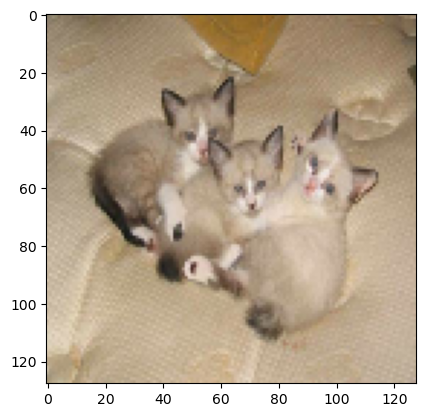

0


In [25]:
plt.imshow(img[0].numpy().astype('uint8'))
plt.show()
print(label[0].numpy())

In [8]:
early_stop=tf.keras.callbacks.EarlyStopping(patience=2)
'''model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

histroy=model.fit(train_ds,validation_data=valid_ds,epochs=10,callbacks=[early_stop])
model.evaluate(test_ds)'''

"model=tf.keras.Sequential([\n    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),\n    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(1)\n])\n\nmodel.compile(\n    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),\n    optimizer='adam',\n    metrics=['accuracy']\n)\n\nhistroy=model.fit(raw_train_ds,validation_data=raw_valid_ds,epochs=10,callbacks=[early_stop])\nmodel.evaluate(raw_test_ds)"

In [9]:
from keras.applications import ResNet50V2

In [10]:
RN_model=ResNet50V2(input_shape=(img_size,img_size,3),weights='imagenet',include_top=False)
RN_model.trainable=False

In [27]:
model2=tf.keras.Sequential([
    tf.keras.Input(shape=(img_size,img_size,3)),
    tf.keras.layers.Rescaling(1./255),
    RN_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [28]:
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
history=model2.fit(train_ds,validation_data=valid_ds,epochs=10,callbacks=[early_stop])

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 139s 671ms/step - accuracy: 0.8481 - loss: 0.3906 - val_accuracy: 0.9281 - val_loss: 0.1623
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 664ms/step - accuracy: 0.9353 - loss: 0.1471 - val_accuracy: 0.9325 - val_loss: 0.1467
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 664ms/step - accuracy: 0.9477 - loss: 0.1238 - val_accuracy: 0.9350 - val_loss: 0.1452
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 132s 663ms/step - accuracy: 0.9527 - loss: 0.1158 - val_accuracy: 0.9394 - val_loss: 0.1447
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 665ms/step - accuracy: 0.9558 - loss: 0.1044 - val_accuracy: 0.9325 - val_loss: 0.1470
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 665ms/step - accuracy: 0.9579 - loss: 0.1004 - val_accuracy: 0.9444 - val_loss: 0.1412
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 134s 672ms/step - accuracy: 0.9628 - loss: 0.0891 - val_accuracy: 0.9444 - val_loss: 0.1409
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 666ms/step - accuracy: 0.9632 -

In [31]:
ypred=model2.predict(test_ds)

63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 551ms/step


In [103]:
eval=model2.evaluate(test_ds)

63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 533ms/step - accuracy: 0.9444 - loss: 0.1614


In [39]:
pred2=np.where(tf.math.sigmoid(ypred).numpy()>0.5,1,0)

In [49]:
pred2=pred2.reshape(2000)

In [86]:
ytest=[]
for img_batch,label_batch in raw_test_ds:
    for label in list(label_batch):
        ytest.append(label.numpy())

In [95]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

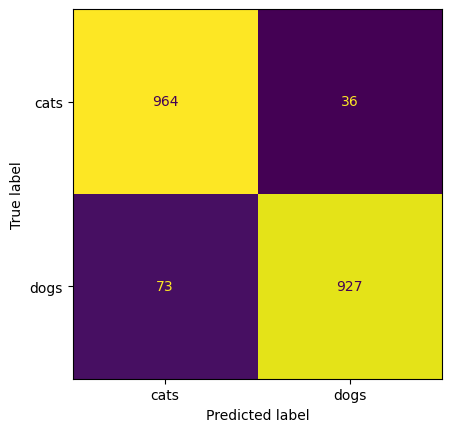

In [102]:
cm=confusion_matrix(ytest,pred2)
cmd=ConfusionMatrixDisplay(cm,display_labels=raw_train_ds.class_names)
cmd.plot(colorbar=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


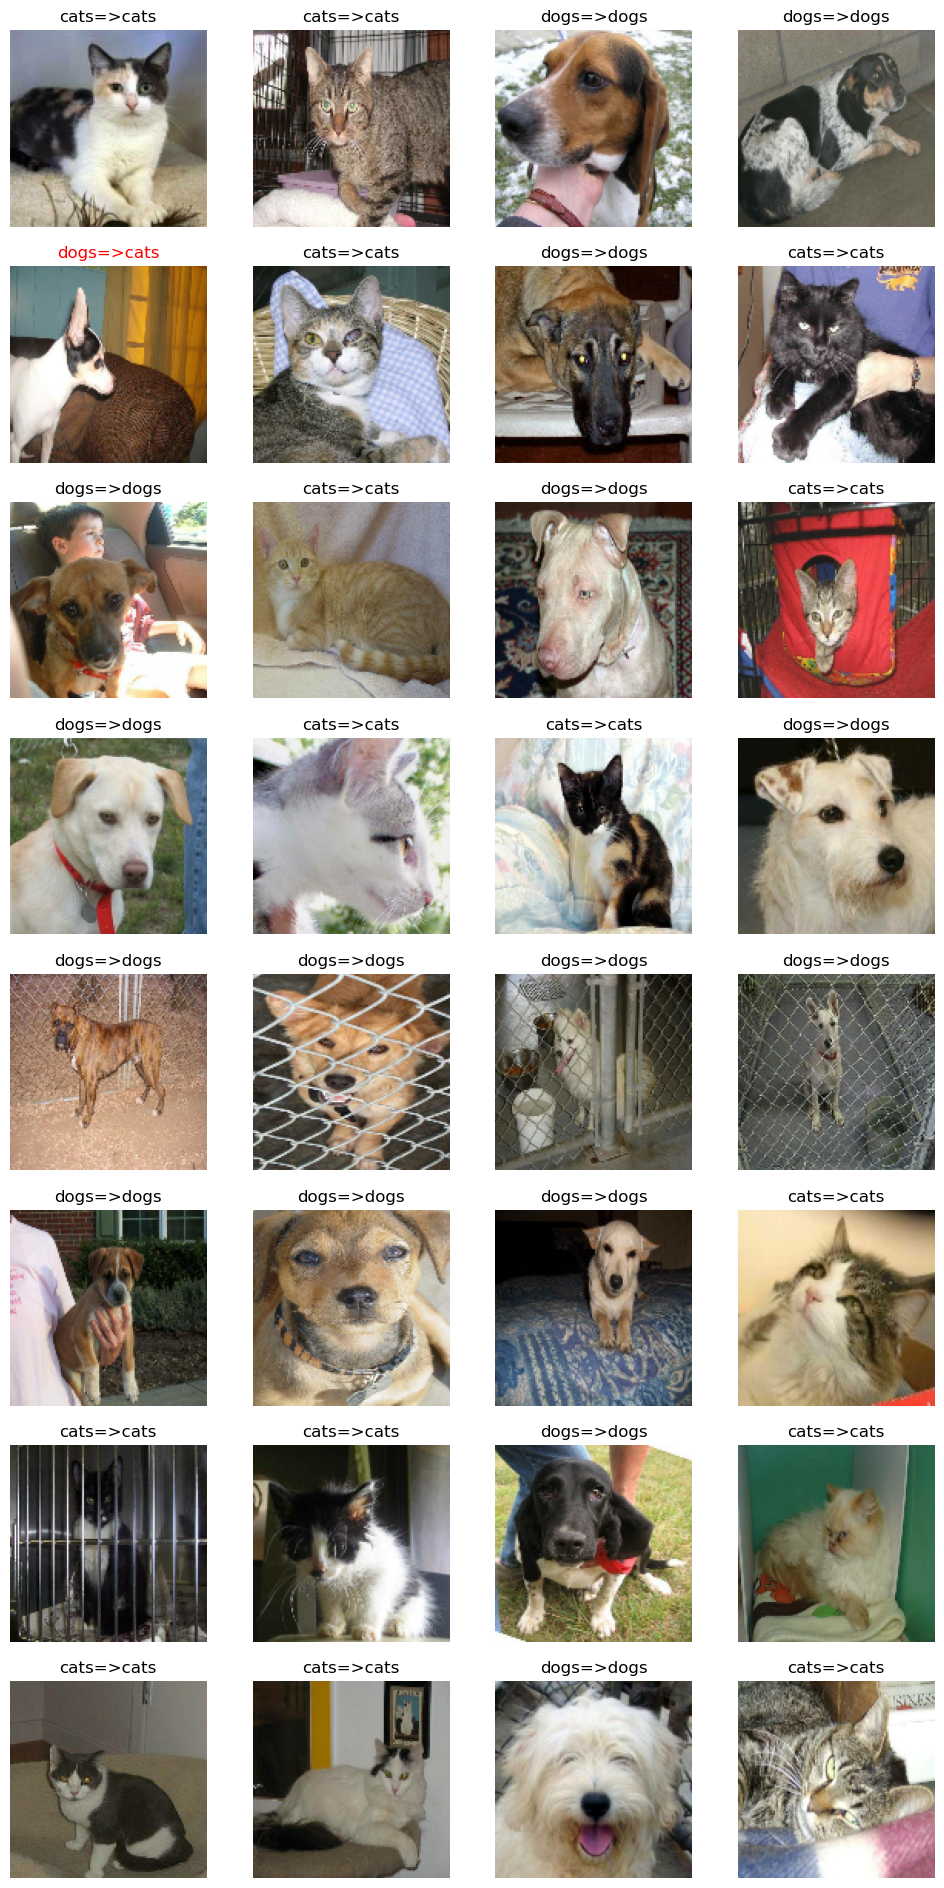

In [154]:
cols=4
rows=8
classes=raw_train_ds.class_names
for img_batch,label_batch in raw_test_ds.take(1):
    ypred=model2.predict(img_batch)
    ypred=np.where(tf.math.sigmoid(ypred).numpy()>0.5,1,0).reshape(32)
    fig,axes=plt.subplots(ncols=cols,nrows=rows,figsize=(12,24))
    for i in range(rows):
        for j in range(cols):
            n=i*cols+j
            axes[i][j].imshow(img_batch[n].numpy().astype('uint8'))
            if label_batch[n].numpy()==ypred[n]:
                color='black'
            else:
                color='red'
            axes[i][j].set_title(classes[label_batch[n].numpy()]+'=>'+classes[ypred[n]],color=color)
            axes[i][j].axis('off')


0